# Visualizing earnings based on college majors

In this notebook we will be using the functionality of [matplotlib](https://matplotlib.org/3.1.0/index.html). 

We aim to explore how using pandas plotting functionality alongside a notebook interface allows us to quickly and effectively generate visualizations to explore a dataset while working with pandas. 

The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data.
The cleaned dataset used can be downloaded from the [FiveThirtyEight Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors). 

### Data dictionary

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are **some** of the columns in the dataset:

* Rank - Rank by median earnings (the dataset is ordered by this column).
* Major_code - Major code.
* Major - Major description.
* Major_category - Category of major.
* Total - Total number of people with major.
* Sample_size - Sample size (unweighted) of full-time.
* Men - Male graduates.
* Women - Female graduates.
* ShareWomen - Women as share of total.
* Employed - Number employed.
* Median - Median salary of full-time, year-round workers.
* Low_wage_jobs - Number in low-wage service jobs.
* Full_time - Number employed 35 hours or more.
* Part_time - Number employed less than 35 hours.

## Aim

Using visualizations, we can start to explore questions from the dataset like:

* Do students in more popular majors make more money? Using scatter plots
* How many majors are predominantly male? Predominantly female? Using histograms
* Which category of majors have the most students? Using bar plots



In [0]:
# setup the environment by importing the libraries we need and running the necessary Jupyter magic so that plots are displayed inline
import pandas as pd
import matplotlib 

%matplotlib inline



In [2]:
# mount drive and read csv into dataframe
from google.colab import drive
drive.mount('/content/gdrive')

recent_grads = pd.read_csv('/content/gdrive/My Drive/Datasets/recent-grads.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
# familiarize with structure of data
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [4]:
recent_grads.head()


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [5]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,5043,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,1848,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,1724,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,3154,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,593,237,410,87,0.104946,22000,20000,22000,288,338,192


In [6]:
# generate summary statsitics for all columns
raw_data_count = recent_grads.shape[0]
print(raw_data_count)
recent_grads.describe()


173


,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [7]:
# drop rows with null values
recent_grads.dropna(axis=0, inplace=True)
cleaned_data_count = recent_grads.shape[0]
print(cleaned_data_count)



172


## Plotting data

Most of the plotting functionality in pandas is contained within the [`DataFrame.plot()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html). Method takes a required `kind` parameter to specify the type of plot required. Method takes an optional argument `backend` which specifies the backend to be used - default is matplotlib.

### Generate scatter plots to compare correlation between columns

We can quickly and usefully generate plots in Jupyter notebook cells using underlying matplotlib functionality:


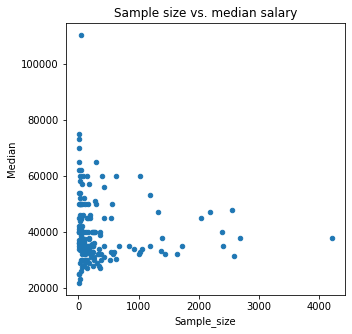

In [8]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Sample size vs. median salary', figsize=(5, 5))

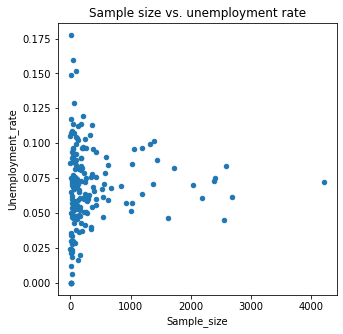

In [9]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', title='Sample size vs. unemployment rate', figsize=(5, 5))

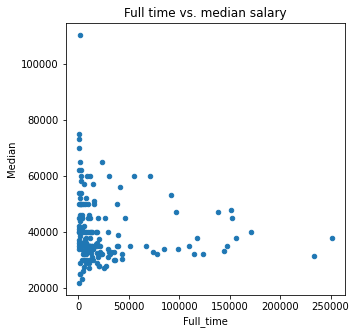

In [10]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter', title='Full time vs. median salary', figsize=(5, 5))

There does not appear to be a strong correlation between the number of full time students and the median salary for majors. 

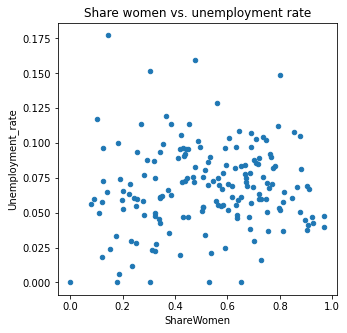

In [11]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title='Share women vs. unemployment rate', figsize=(5, 5))

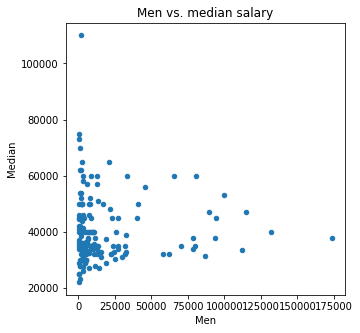

In [12]:
recent_grads.plot(x='Men', y='Median', kind='scatter', title='Men vs. median salary', figsize=(5, 5))

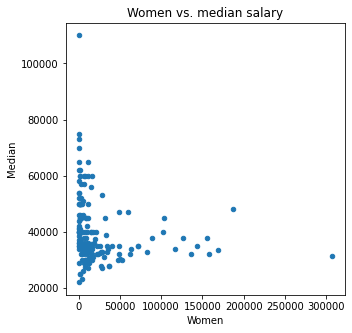

In [13]:
recent_grads.plot(x='Women', y='Median', kind='scatter', title='Women vs. median salary', figsize=(5, 5))

There does not appear to be strong correlation between the number of females on a major and the median salary.

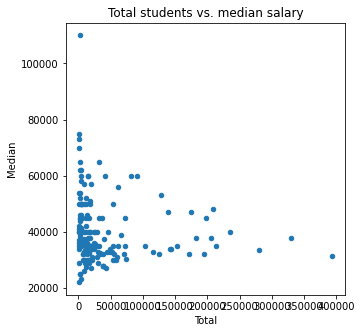

In [14]:
recent_grads.plot(x='Total', y='Median', kind='scatter', title='Total students vs. median salary', figsize=(5, 5))

There does not appear to be correlation between total students and median salary. 

None of these columns seem to correlate on first visual inspection. 

### Generate histograms to explore distribution of values in columns

We use `Series.plot()` to plot a specific column and `DataFrame.plot()` to generate plots that use values from multiple columns. For `Series.plot()`, you'll notice there is no way to control the binning strategy for histograms. Luckily, we can control the binning strategy of a histogram using `Series.hist()`, which contains parameters specific to customizing histograms. 

Note since that the bins all have equal width, the y-axis will represent frequency not frequency density. 

Generate histograms to explore the distribution of values for various columns in the dataset:


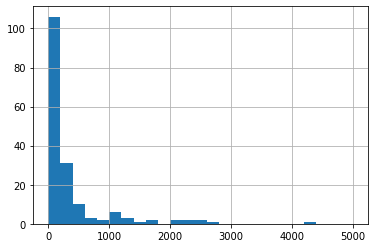

In [15]:
recent_grads['Sample_size'].hist(bins=25, range=(0, 5000))

The max value in the `Sample_size` column is 4212 and the min value is 2. 

The large majority of sample sizes are very small (below 200).

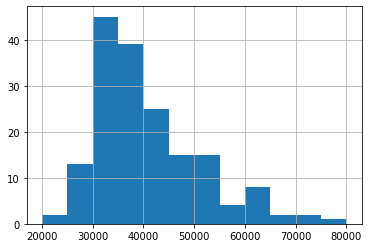

In [16]:
recent_grads['Median'].hist(bins=12, range=(20000, 80000))

The max value for the `median` column is 110000 but this results in poor resolution on the majority of the data. There appears to be novalues between ~80000 and ~110000 and the min value is 22000 so range parameter set to maximize resolution and include most of the data. 

Median salary is in the 30000 to 40000 range for over half of majors. Very few majors earn over 65000 or less than 25000 on average. 

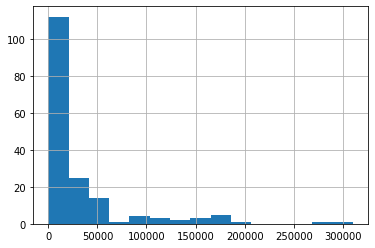

In [17]:
recent_grads['Employed'].hist(bins=15, range=(0, 310000))

`Employed` values range from 0 to 310000. The large majority of majors have lower values in this range. 



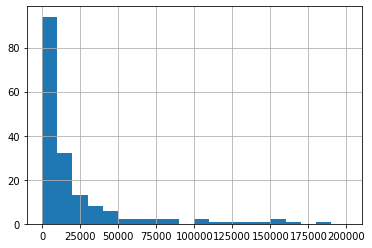

In [18]:
recent_grads['Women'].hist(bins=20, range=(0, 200000))

The most common interval of values for women on a major is 0-10000. 



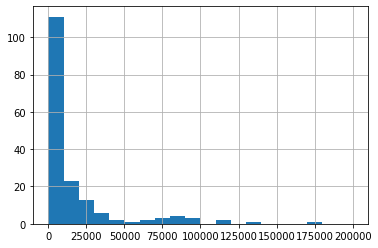

In [19]:
recent_grads['Men'].hist(bins=20, range=(0, 200000))

The same range and number of bins has been used to compare the distribution of the `Women` and `Men` columns more easily. There appears to be a very simmialr distribution with the most common interval of values for men on a major also being 0-10000.

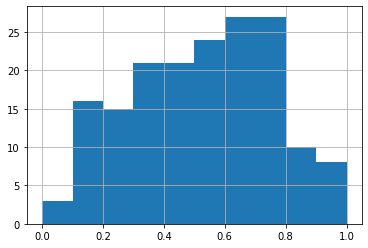

In [20]:
recent_grads['ShareWomen'].hist(bins=10, range=(0, 1))

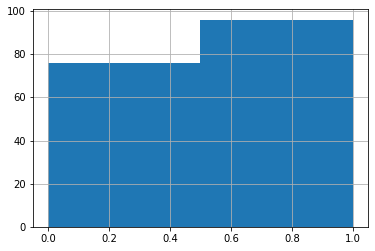

In [21]:
recent_grads['ShareWomen'].hist(bins=2, range=(0, 1))

The binary histogram confirms the apparent skew of the first histogram: the higher percentage of majors are predominantly female (around 56%). 

### Scatter matrix plot 

A scatter matrix plot combines both scatter plots and histograms into one grid of plots and allows us to explore potential relationships and distributions simultaneously. A scatter matrix plot consists of n by n plots on a grid, where n is the number of columns, the plots on the main diagonal are histograms, and the non-main-diagonal plots are scatter plots.

Scatter matrix plots are regularly used in exploratory data analysis. pandas contains a function named `scatter_matrix()` to generate them. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f895a9e5c18>,
      dtype=object)

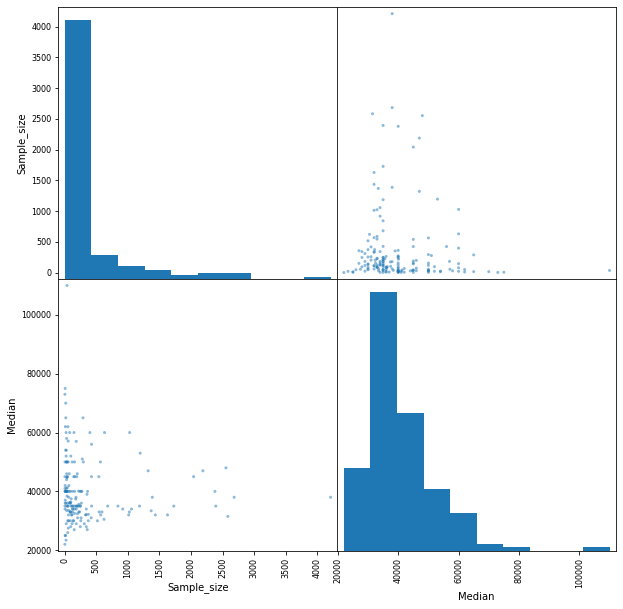

In [22]:
# import scatter_matrix function from pandas.plotting module
from pandas.plotting import scatter_matrix

scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10, 10), diagonal='hist')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f895a8a5438>,
      dtype=object)

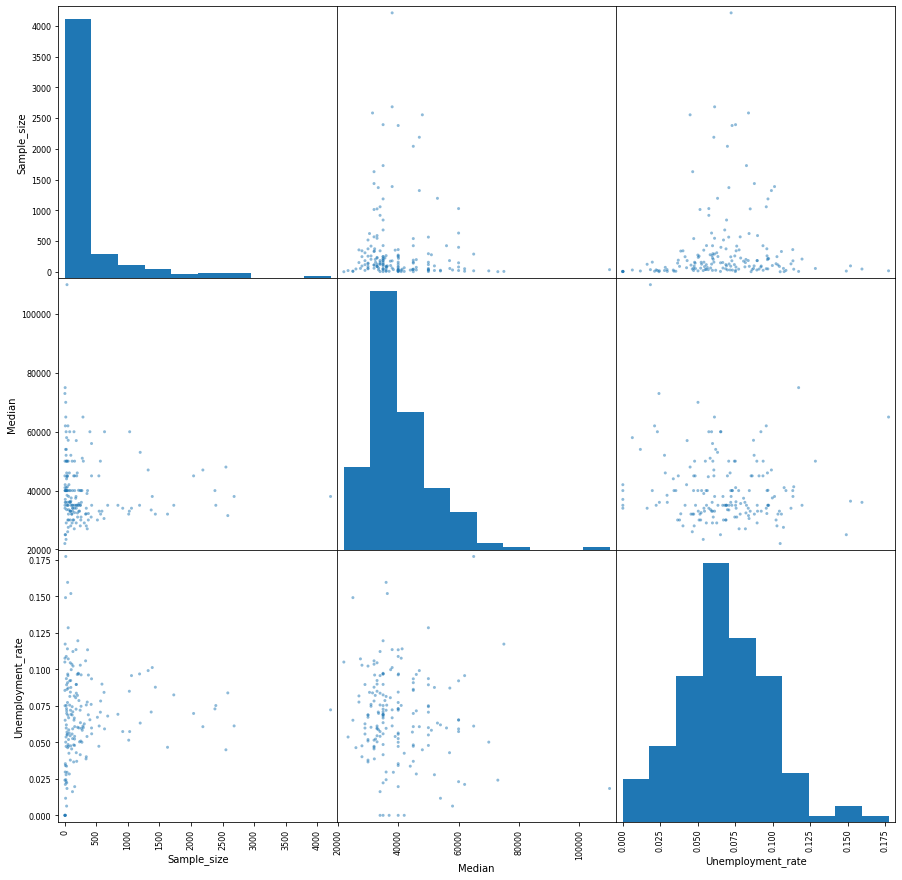

In [23]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(15, 15))

Looking at the scatter diagrams off the main diagonal, it is difficult to ascertain any correlation between any pair of these columns. Looking at the histograms, the distribution of `Sample_size` and `Median` is positively skewed whereas the distribution of `Unemployment_rate` is more symetrically disbributed and more spread out (higher standard deviation relative to arithmetic mean). 

## Bar plots in pandas

When creating bar plots using pandas, we only need specify the data we want the bars to represent and the labels for each bar. Using the `DataFrame.plot.bar()` method, we can use the x parameter to specify the labels and the y parameter to specify the data for the bars:

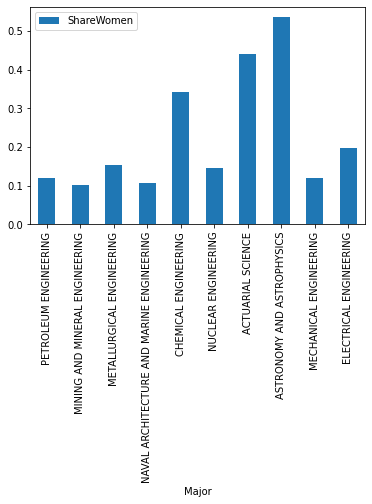

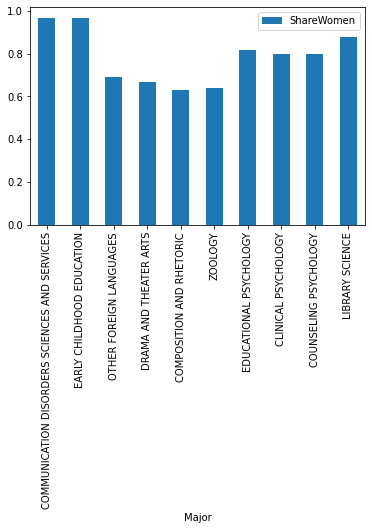

In [24]:
# ShareWomen first 10 rows and last 10 rows in DataFrame
ax1 = recent_grads[:10].plot.bar(x='Major', y='ShareWomen')
ax2 = recent_grads[-10:].plot.bar(x='Major', y='ShareWomen')


Remember that the dataset rows are ordered by median earnings. These two bar charts show that the lowest earning majors all have a majority share of women and all except one of the higest earning majors have a majority share of men.

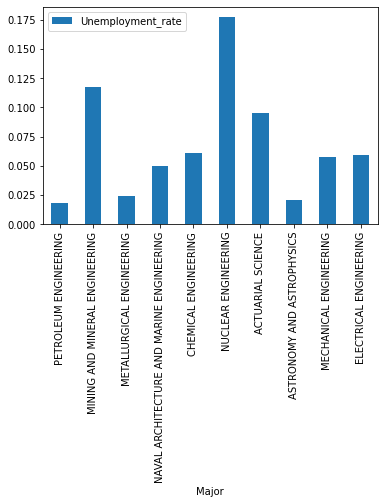

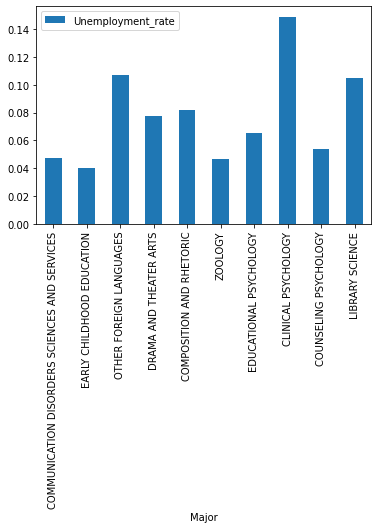

In [25]:
# Unemployment_rate first 10 rows and last 10 rows in DataFrame
ax1 = recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate')
ax2 = recent_grads[-10:].plot.bar(x='Major', y='Unemployment_rate')

This pair of bar charts clearly shows that there are significantly higher unemployment rates for majors with the lowest median salaries in the data set relative to the majors with the highest median salaries. 

### Grouped bar charts

Use a grouped bar plot to compare the number of men with the number of women in each category of majors.


In [35]:
# aggregate Men and Women by Major_category to single dict with keys as two element lists then use to create dataframe
gender_category_dict = {}

for c in recent_grads['Major_category'].unique():
  gender_category_dict[c] = [recent_grads.loc[recent_grads['Major_category'] == c, 'Men'].sum()]
  gender_category_dict[c].append(recent_grads.loc[recent_grads['Major_category'] == c, 'Women'].sum())

gender_category_df = pd.DataFrame.from_dict(gender_category_dict, orient='index', columns=['Men', 'Women'])
print(gender_category_df)

                                          Men     Women
Engineering                          408307.0  129276.0
Business                             667852.0  634524.0
Physical Sciences                     95390.0   90089.0
Law & Public Policy                   91129.0   87978.0
Computers & Mathematics              208725.0   90283.0
Industrial Arts & Consumer Services  103781.0  126011.0
Arts                                 134390.0  222740.0
Health                                75517.0  387713.0
Social Science                       256834.0  273132.0
Biology & Life Science               184919.0  268943.0
Education                            103526.0  455603.0
Agriculture & Natural Resources       40357.0   35263.0
Humanities & Liberal Arts            272846.0  440622.0
Psychology & Social Work              98115.0  382892.0
Communications & Journalism          131921.0  260680.0
Interdisciplinary                      2817.0    9479.0


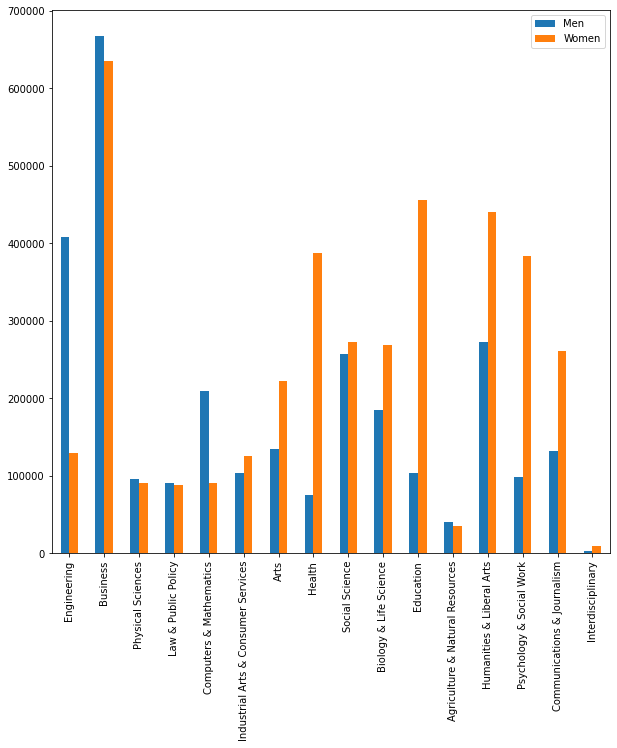

In [39]:
# plot grouped bar chart using created dataframe
gender_category_df.plot.bar(figsize=(10, 10))


Engineering and Computers & Mathematics have significantly more men than women. Arts, Health, Biology & Life Science, Education, Humanities & Liberal Arts, Psychology & Social Work and Communications & Journalism have significantly more women than men. 

## Using boxplots to explore distributions of columns

Boxplots can show us the range and positions of the quartiles for columns in the dataset. Use a box plot to explore the distributions of median salaries and unemployment rate:


Median                  AxesSubplot(0.125,0.125;0.352273x0.755)
Unemployment_rate    AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

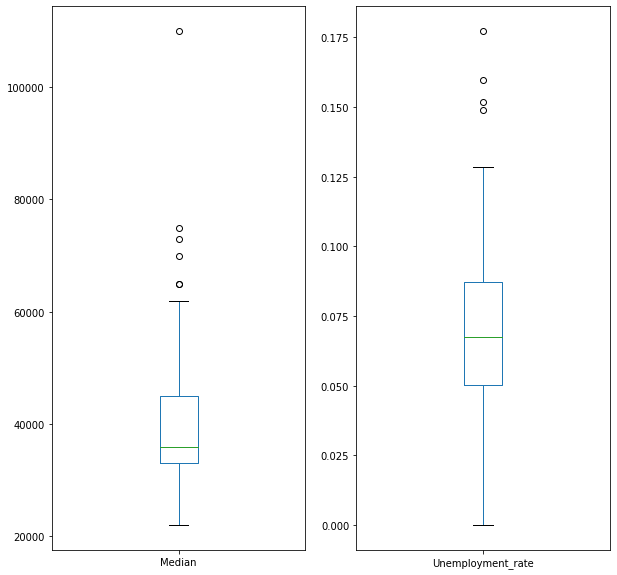

In [42]:
recent_grads.loc[:, ['Median', 'Unemployment_rate']].plot(kind='box', subplots=True, figsize=(10, 10))

We can see that the median salary column values are positively skewed (as observed earlier on the histogram) as the median is much closer to Q1 than to Q3. There are five outliers with four being moderate outliers and one being an extreme outlier.

The Unemployment rate is more symmetrically distributed about the median of around 7%. There are four outliers with high unemployment rates of approximately 14-19%.

## Hexagonal bin plot 

As alternative to scatter diagram - useful when density of points is high. 

Use a hexagonal bin plot to visualize the relationshp between pairs of columns that produced dense scatter plots from earlier in the project. I think the most interesting of these relationships to visualize are: ShareWomen vs. Unemployment_rate, Woman vs. Median and Total vs. Median. 


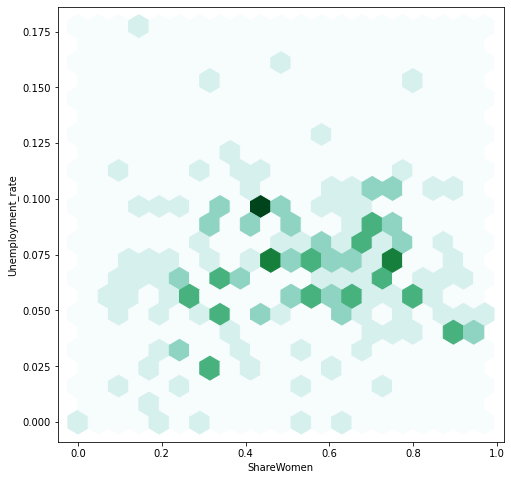

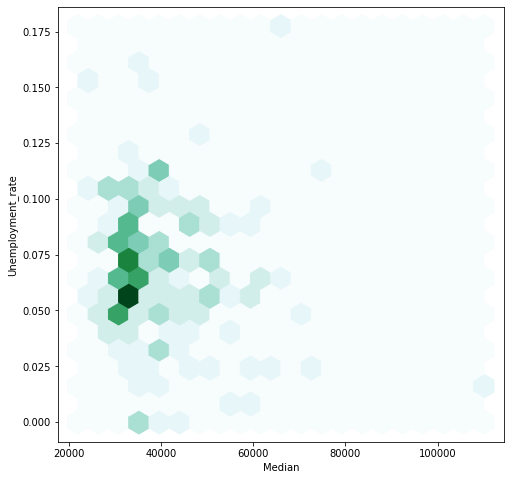

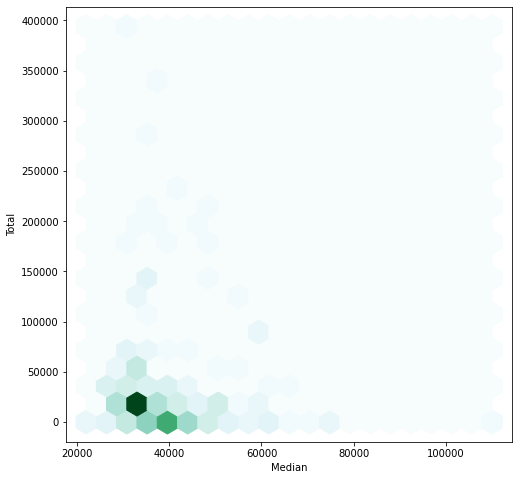

In [62]:
# Note colorbar=True causes x axis to lose ticks and labels
recent_grads.plot.hexbin('ShareWomen', 'Unemployment_rate', figsize=(8, 8), gridsize=20, colorbar=False) 
recent_grads.plot.hexbin('Median', 'Unemployment_rate', figsize=(8, 8), gridsize=20, colorbar=False) 
recent_grads.plot.hexbin('Median', 'Total', figsize=(8, 8), gridsize=20, colorbar=False) 
